In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('datasets\Tree_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [3]:
print(df.columns)
print(df.describe())
print(df.info())
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null 

In [4]:
corr = df.dropna().corr()
pd.options.display.float_format = '{:,.2f}'.format
corr#.mask((-0.2 < corr) & (0.2 > corr))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,0.15,-0.09,0.03,-0.08,-0.05,0.03
Survived,0.15,1.00,-0.03,-0.25,0.11,0.02,0.13
Pclass,-0.09,-0.03,1.00,-0.31,-0.10,0.05,-0.32
Age,0.03,-0.25,-0.31,1.00,-0.16,-0.27,-0.09
SibSp,-0.08,0.11,-0.10,-0.16,1.00,0.26,0.29
Parch,-0.05,0.02,0.05,-0.27,0.26,1.00,0.39
Fare,0.03,0.13,-0.32,-0.09,0.29,0.39,1.00


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data cleaning

In [6]:
df1 = (df
       .assign(survived = df.Survived.astype(bool),
               pclass = df.Pclass.astype('Int8'),
               sex = df.Sex.map({'male': 0,'female': 1}).astype('Int8'),
               age = df.Age.fillna(np.round(df.Age.mean())),
               sib_sp = df.SibSp.astype('Int8'),
               sib_sp_nonzero = df.SibSp.astype('Int8') > 0,
               par_ch = df.Parch.astype('Int8'),
               par_ch_nonzero = df.Parch.astype('Int8') > 0,
               fare = df.Fare
              )
       .drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
              'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
)
df1

,survived,pclass,sex,age,sib_sp,sib_sp_nonzero,par_ch,par_ch_nonzero,fare
0,False,3,0,22.00,1,True,0,False,7.25
1,True,1,1,38.00,1,True,0,False,71.28
2,True,3,1,26.00,0,False,0,False,7.92
3,True,1,1,35.00,1,True,0,False,53.10
4,False,3,0,35.00,0,False,0,False,8.05
...,...,...,...,...,...,...,...,...,...
886,False,2,0,27.00,0,False,0,False,13.00
887,True,1,1,19.00,0,False,0,False,30.00
888,False,3,1,30.00,1,True,2,True,23.45
889,True,1,0,26.00,0,False,0,False,30.00


# Data exploration

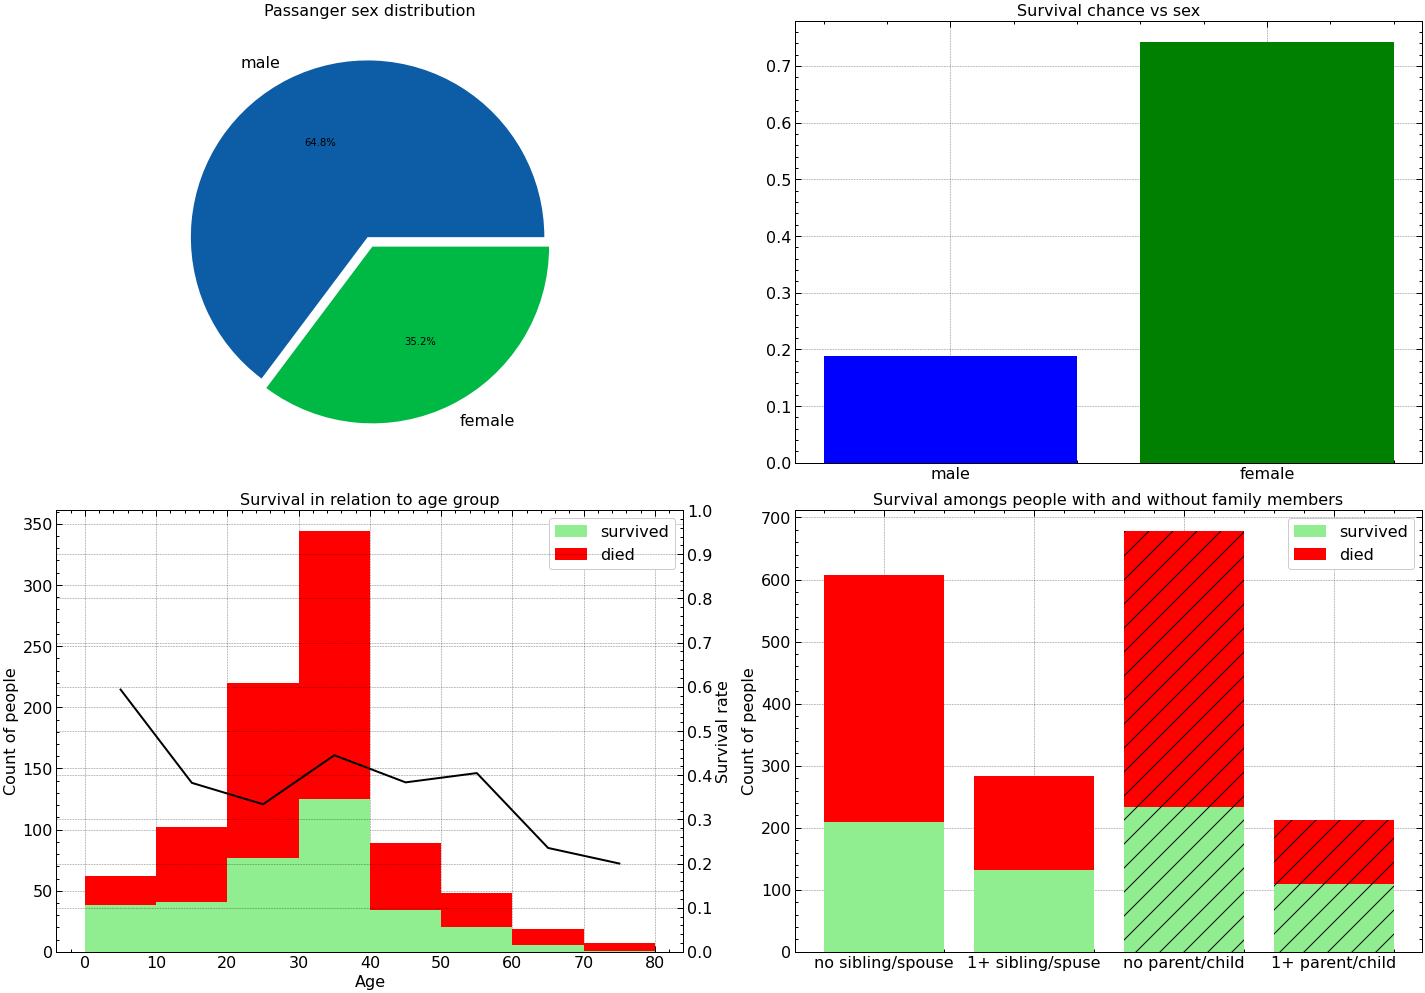

In [7]:
plt.style.use(['science' , 'notebook', 'grid'])
fig, axes = plt.subplots(2, 2, figsize=(20,14))

ax = axes[0][0]
ax.set_title('Passanger sex distribution')
ax.pie(df1.sex.value_counts(), labels=['male', 'female'], autopct='%.1f%%', explode=[0.03, 0.03])

ax = axes[0][1]
survival_men = (df1.query('sex == 0', engine='python').sum() / df1.query('sex == 0', engine='python').count())[0]
survival_women = (df1.query('sex == 1', engine='python').sum() / df1.query('sex == 1', engine='python').count())[0]
ax.set_title('Survival chance vs sex')
ax.bar(['male', 'female'], [survival_men, survival_women], color=['b', 'g'])

ax = axes[1][0]
ax.hist((df1.query('survived == True').age, df1.query('survived == False').age), np.arange(0, 90, 10), histtype='bar', stacked=True, label=['survived', 'died'], color=['lightgreen', 'r'])
ax.plot()
ax.set_title('Survival in relation to age group')
ax.set_xlabel('Age')
ax.set_ylabel('Count of people')
ax.legend()

ax2 = ax.twinx()
ax2.set_ylabel('Survival rate')
life_death = df1.groupby([pd.cut(df1.age, np.arange(0, 90, 10)), 'survived']).count().pclass.values
survival_agebins = life_death[1::2] / (life_death[1::2] + life_death[0::2])
ax2.plot(np.arange(5, 85, 10), survival_agebins, color='black')
ax2.set_yticks(np.arange(0, 1.1, 0.1))

ax = axes[1][1]
ax.set_title('Survival amongs people with and without family members')
ax.set_ylabel('Count of people')
g_1 = df1.query('sib_sp_nonzero == False', engine='python').survived.value_counts()[1]
g_2 = df1.query('sib_sp_nonzero == False', engine='python').survived.value_counts()[0]
g_3 = df1.query('sib_sp_nonzero == True', engine='python').survived.value_counts()[1]
g_4 = df1.query('sib_sp_nonzero == True', engine='python').survived.value_counts()[0]

g_5 = df1.query('par_ch_nonzero == False', engine='python').survived.value_counts()[1]
g_6 = df1.query('par_ch_nonzero == False', engine='python').survived.value_counts()[0]
g_7 = df1.query('par_ch_nonzero == True', engine='python').survived.value_counts()[1]
g_8 = df1.query('par_ch_nonzero == True', engine='python').survived.value_counts()[0]

ax.bar(['no sibling/spouse'], g_1, label='survived', color='lightgreen')
ax.bar(['no sibling/spouse'], g_2, bottom=g_1, label='died', color='r')
ax.bar(['1+ sibling/spouse'], g_3, color='lightgreen')
ax.bar(['1+ sibling/spouse'], g_4, bottom=g_3, color='r')

ax.bar(['no parent/child'], g_5, color='lightgreen', hatch='/')
ax.bar(['no parent/child'], g_6, bottom=g_5, color='r', hatch='/')
ax.bar(['1+ parent/child'], g_7, color='lightgreen', hatch='/')
ax.bar(['1+ parent/child'], g_8, bottom=g_7, color='r', hatch='/')
ax.legend()

plt.tight_layout()
plt.show()